# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [4]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [5]:
!pip install xgboost

## Data Overview

- Observations
- Sanity checks

In [6]:
data = pd.read_csv("C:/Users/samyu/Documents/PGP - DSBA/Ensemble Techniques/Project/EasyVisa.csv")

In [7]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [8]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [9]:
data.shape

(25480, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [11]:
#Checking the statistical summary for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [12]:
#checking the statistical summary for non numerical columns
data.describe(exclude='number').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [13]:
#We will check for missing values in the data
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

We observe that there are no missing values in the data

In [14]:
#We will also check for any duplicates in the data.
data.duplicated().sum()

0

This confirms that there are no duplicates. we have completed all observations and sanity checks.

In [15]:
#format numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)  # to display numbers rounded off to 2 decimal places

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate Analysis

In [16]:
## we write a function to get a histogram and boxplot for all the numerical variables
##This function takes the numerical variable as input and returns a boxplot and histogram and will help in making our analysis more efficient and quicker

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2,(ax_box2, ax_hist2)= plt.subplots(nrows = 2,sharex = True,gridspec_kw ={"height_ratios": (0.25,0.75)},figsize=figsize,)
    sns.boxplot(data=data,x=feature,ax= ax_box2,showmeans = True,color = "violet")
    sns.histplot(data=data,x=feature,ax=ax_hist2,kde=kde,bins=bins
    ) if bins else sns.histplot(
        data=data,x=feature,ax=ax_hist2,kde=kde)
    ax_hist2.axvline(data[feature].mean(),color="green",linestyle="--")
    ax_hist2.axvline(data[feature].median(),color="black",linestyle="-")

In [17]:
# function to create labeled barplots

def labeled_barplot(data, feature, feature_2, order, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    feature_2: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='viridis',
        order=order,
        hue=feature_2,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5), cmap='viridis')
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [19]:
#convert all columns from object dtype into category dtype
for col in data.columns[data.dtypes=='object']:
    data[col] = data[col].astype('category')

In [20]:
#drop the column 'case id' from the dataframe
data.drop(labels='case_id',axis =1,inplace =True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification ?

In [22]:
#group data by education of employee and count the number of each case_status for each category
data.groupby('education_of_employee')['case_status'].value_counts()

education_of_employee  case_status
Bachelor's             Certified      6367
                       Denied         3867
Doctorate              Certified      1912
                       Denied          280
High School            Denied         2256
                       Certified      1164
Master's               Certified      7575
                       Denied         2059
Name: case_status, dtype: int64

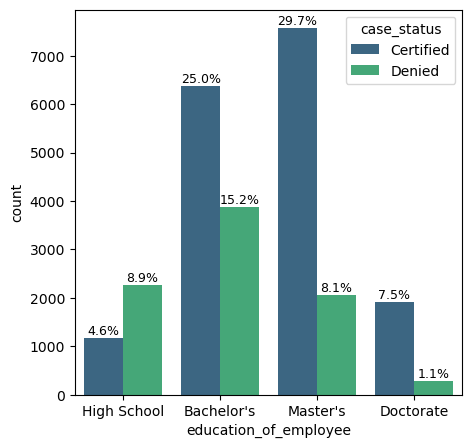

In [23]:
labeled_barplot(data,'education_of_employee','case_status',order=["High School","Bachelor's","Master's","Doctorate"],perc=True)

### 2. How does the visa status vary across different continents ?

In [24]:
# groupby data across different continents and case_status
data.groupby('continent')['case_status'].value_counts()

continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
Name: case_status, dtype: int64

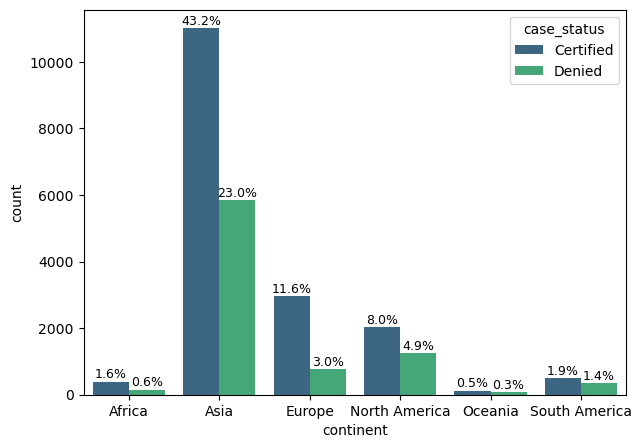

In [25]:
labeled_barplot(data,'continent','case_status',order=None,perc=True)

### 3.Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

In [26]:
#groupby experienced professionals that look abroad for opportunities
data.groupby('has_job_experience')['case_status'].value_counts()

has_job_experience  case_status
N                   Certified       5994
                    Denied          4684
Y                   Certified      11024
                    Denied          3778
Name: case_status, dtype: int64

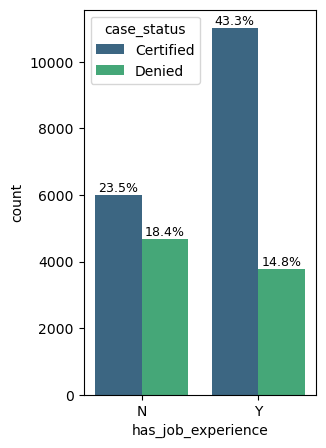

In [27]:
labeled_barplot(data,'has_job_experience','case_status',order=None,perc=True)

### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

In [28]:
data.groupby('unit_of_wage')['case_status'].value_counts()

unit_of_wage  case_status
Hour          Denied          1410
              Certified        747
Month         Certified         55
              Denied            34
Week          Certified        169
              Denied           103
Year          Certified      16047
              Denied          6915
Name: case_status, dtype: int64

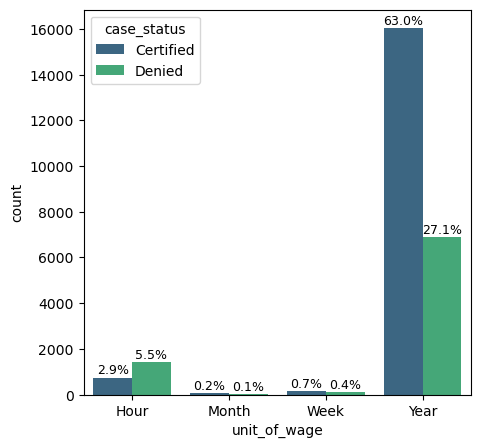

In [29]:
labeled_barplot(data,'unit_of_wage','case_status',order=None,perc=True)

### 5.The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [30]:
data.groupby('prevailing_wage')['case_status'].value_counts()

prevailing_wage  case_status
2.14             Certified      1
                 Denied         0
2.96             Denied         1
                 Certified      0
3.00             Denied         1
                               ..
315497.60        Denied         0
318446.05        Certified      1
                 Denied         0
319210.27        Denied         1
                 Certified      0
Name: case_status, Length: 50908, dtype: int64

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [31]:
data[data.no_of_employees<0].shape

(33, 11)

In [32]:
## dropping the rows where no. of employees are negative
data = data[data.no_of_employees>0]
data.shape

(25447, 11)

In [33]:
#creating bins to categorize number of employees
bins = [0,1000,2000,3000,4000,np.Inf]
names = ['0-1000','1000-2000','2000-3000','3000-4000','4000+']
#creating a new column to categorise and bin the number of employees 
data['employee_size'] = pd.cut(data['no_of_employees'],bins,labels=names)
data.employee_size.value_counts()

0-1000       6208
1000-2000    5915
2000-3000    4978
4000+        4798
3000-4000    3548
Name: employee_size, dtype: int64

In [34]:
data.groupby('unit_of_wage')['prevailing_wage'].mean()

unit_of_wage
Hour      414.77
Month   87592.86
Week    85606.82
Year    81237.54
Name: prevailing_wage, dtype: float64

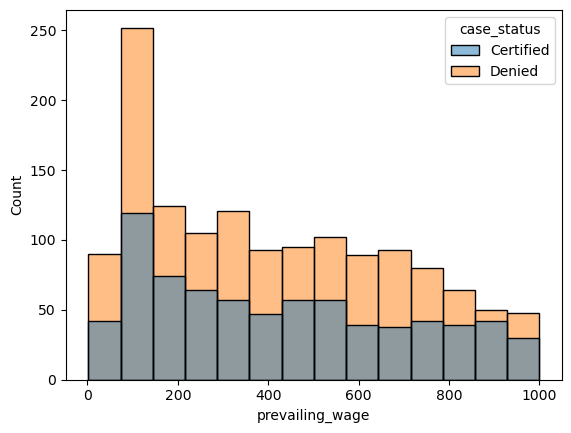

In [35]:
data_hourly = data[data.unit_of_wage == 'Hour']
sns.histplot(data= data_hourly,x='prevailing_wage',hue='case_status')
plt.show()

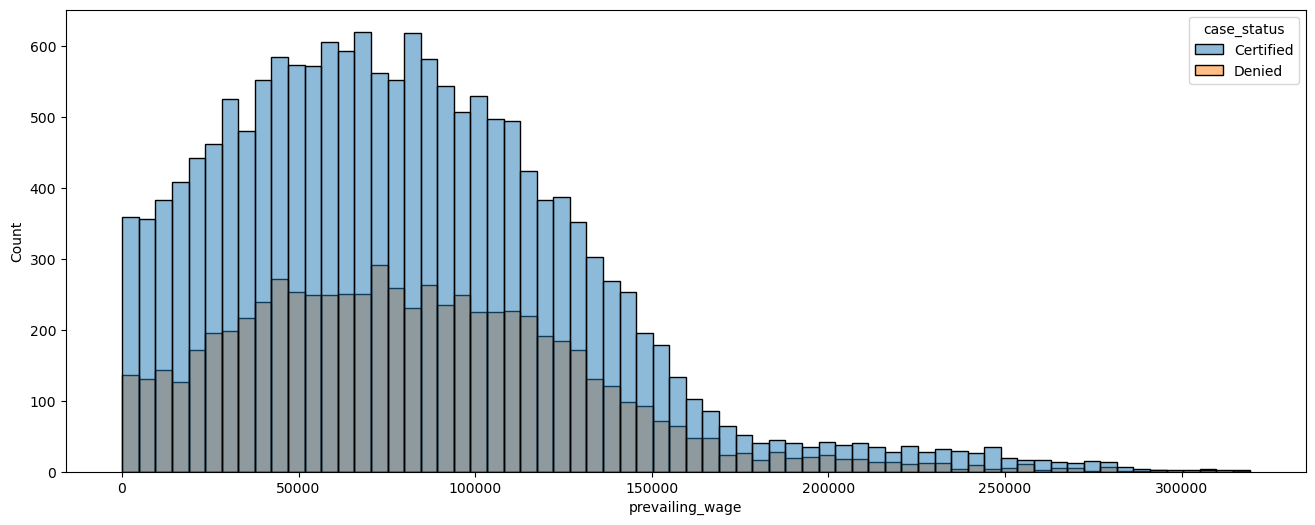

In [36]:
## creating a new dataframe with only those applicants who have annual salaries
data_annual = data[data.unit_of_wage != "Hour"]
## show the distribution of annual salaries , along with the ratio of case_status for each bin
plt.figure(figsize=(16,6))
sns.histplot(data=data_annual, x='prevailing_wage', hue='case_status')
plt.show()

In [37]:
#create bins to categorize a job by its annual salary, which indicates how well paying the job is
bins = [0,25000,50000,75000,100000,125000,np.inf]
names = ['$0-25k','$25k-50k','$50k-75k','$75k-100k','$100k-125k','$125k+']
#assign an applicant to a category
data_annual['income_per_year'] = pd.cut(data_annual['prevailing_wage'], bins, labels=names)
data_annual.groupby('income_per_year')['case_status'].value_counts()

income_per_year  case_status
$0-25k           Certified      2089
                 Denied          759
$25k-50k         Certified      2835
                 Denied         1232
$50k-75k         Certified      3132
                 Denied         1371
$75k-100k        Certified      3011
                 Denied         1315
$100k-125k       Certified      2405
                 Denied         1138
$125k+           Certified      2782
                 Denied         1225
Name: case_status, dtype: int64

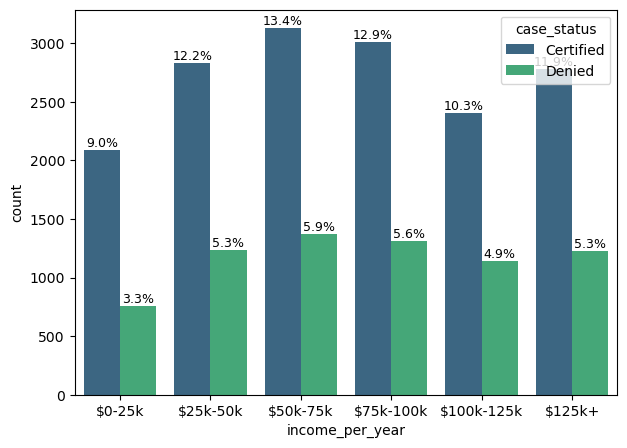

In [38]:
#create a plot of the data above, but additionally with the percent of each group within the total number of cases
labeled_barplot(data_annual,'income_per_year','case_status',perc=True,order=None)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [39]:
#provide summary statistics of all float64 variables
data.describe(include = ['int64']).T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25447.00,5674.42,22891.84,12.00,1025.00,2112.00,3506.50,602069.00
yr_of_estab,25447.00,1979.39,42.39,1800.00,1976.00,1997.00,2005.00,2016.00


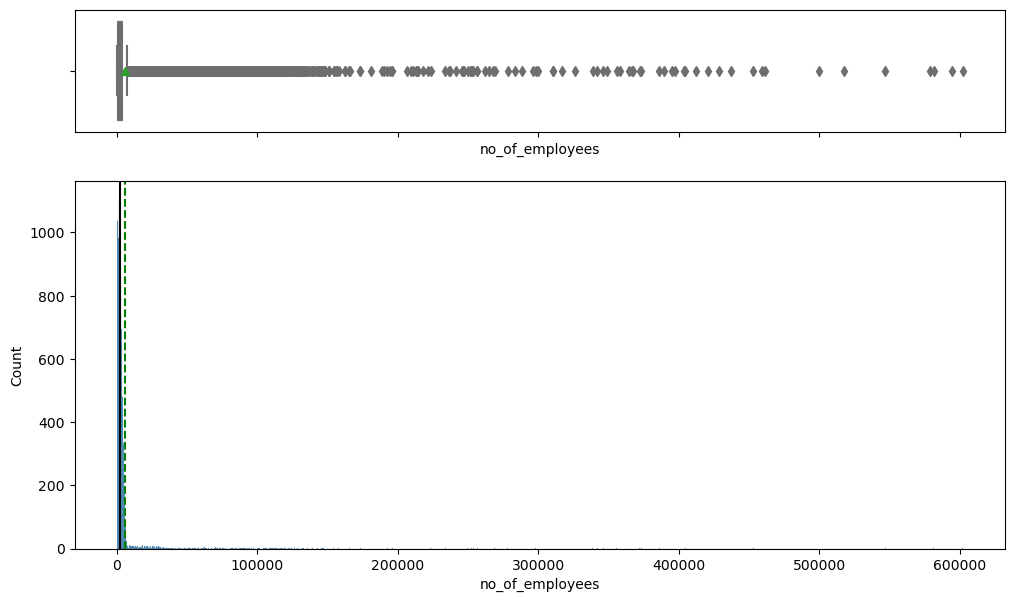

In [40]:
histogram_boxplot(data,'no_of_employees')

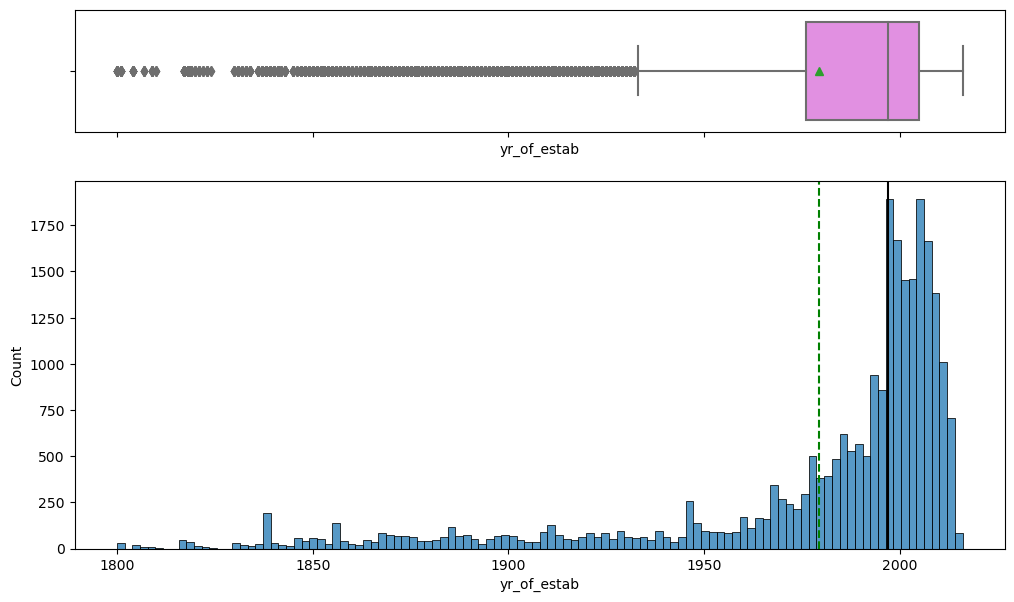

In [41]:
histogram_boxplot(data,'yr_of_estab')

In [42]:
#provide summary statistics of all float64 variables
data.describe(include = ['float64']).T

,count,mean,std,min,25%,50%,75%,max
prevailing_wage,25447.00,74468.28,52822.18,2.14,34039.21,70312.50,107739.51,319210.27


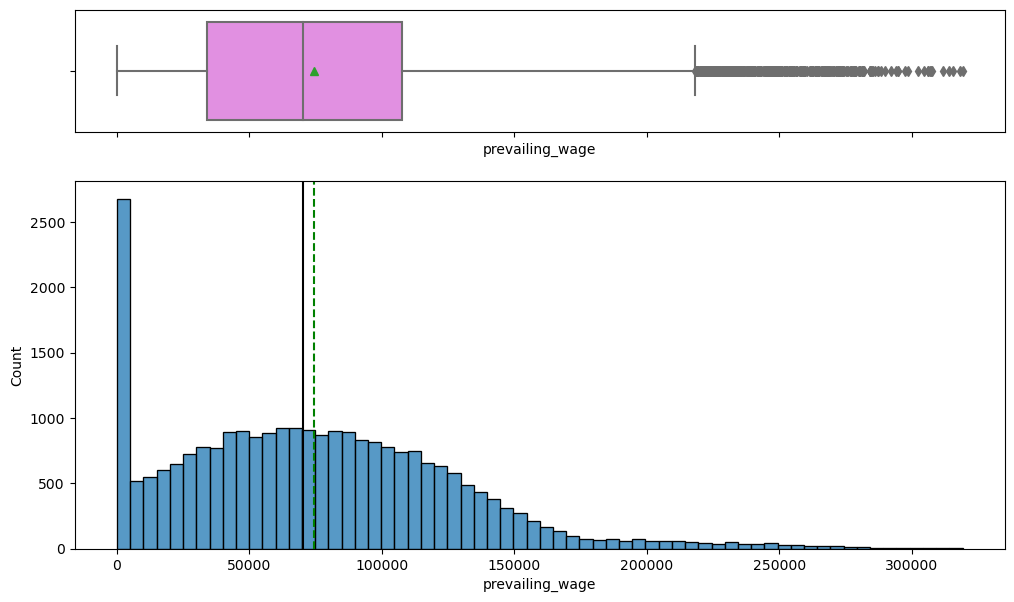

In [43]:
histogram_boxplot(data,'prevailing_wage')

In [44]:
#provide summary statistics of all float64 variables
data_annual.describe(include = ['float64']).T

,count,mean,std,min,25%,50%,75%,max
prevailing_wage,23294.00,81312.84,49943.37,100.00,43860.93,76257.68,111414.45,319210.27


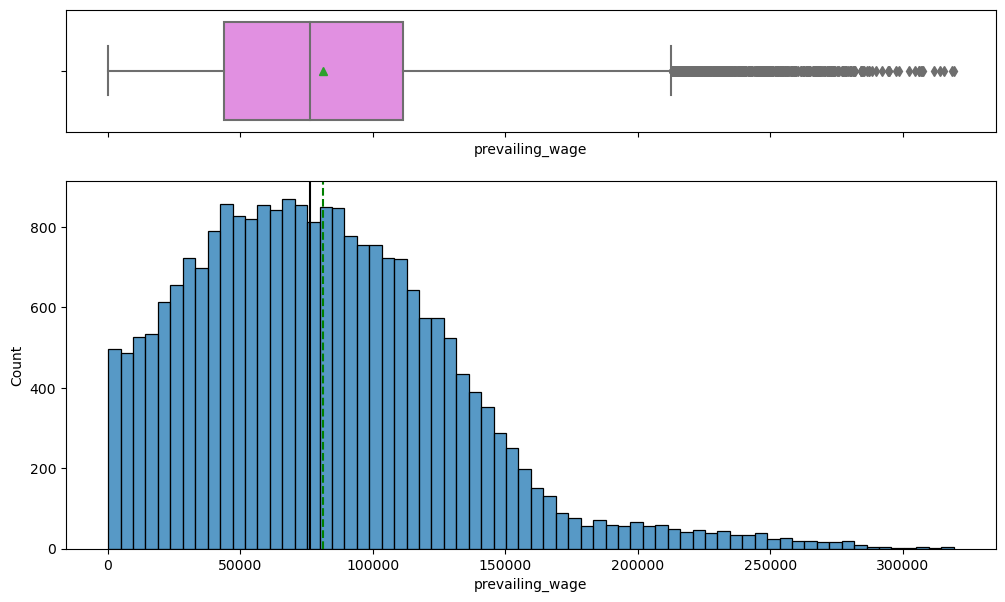

In [45]:
histogram_boxplot(data_annual,'prevailing_wage')

### BiVariate Analysis

continent    Africa   Asia  Europe  North America  Oceania  South America  \
case_status                                                                 
All             550  16840    3727           3287      192            851   
Certified       396  11001    2953           2037      122            492   
Denied          154   5839     774           1250       70            359   

continent      All  
case_status         
All          25447  
Certified    17001  
Denied        8446  
------------------------------------------------------------------------------------------------------------------------


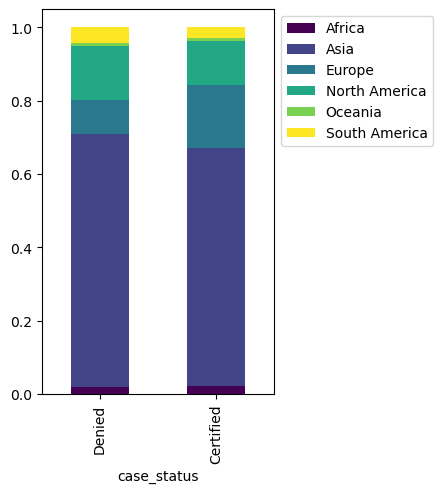

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
case_status                                                               
All                         10220       2189         3416      9622  25447
Certified                    6362       1910         1164      7565  17001
Denied                       3858        279         2252      2057   8446
------------------------------------------------------------------------------------------------------------------------


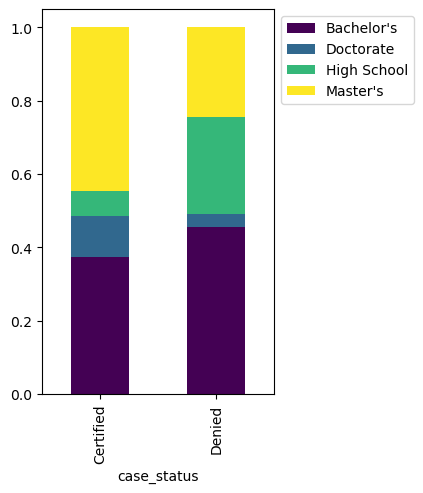

has_job_experience      N      Y    All
case_status                            
All                 10661  14786  25447
Certified            5986  11015  17001
Denied               4675   3771   8446
------------------------------------------------------------------------------------------------------------------------


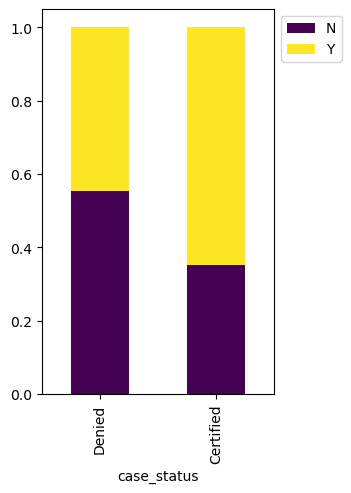

requires_job_training      N     Y    All
case_status                              
All                    22498  2949  25447
Certified              15000  2001  17001
Denied                  7498   948   8446
------------------------------------------------------------------------------------------------------------------------


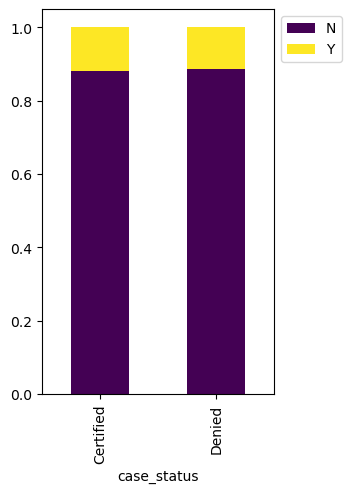

region_of_employment  Island  Midwest  Northeast  South  West    All
case_status                                                         
All                      375     4299       7189   7006  6578  25447
Certified                226     3246       4524   4908  4097  17001
Denied                   149     1053       2665   2098  2481   8446
------------------------------------------------------------------------------------------------------------------------


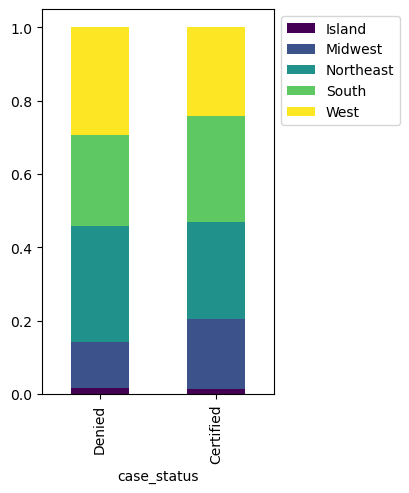

unit_of_wage  Hour  Month  Week   Year    All
case_status                                  
All           2153     89   272  22933  25447
Certified      747     55   169  16030  17001
Denied        1406     34   103   6903   8446
------------------------------------------------------------------------------------------------------------------------


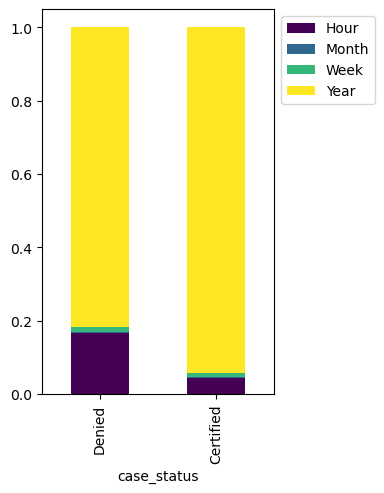

full_time_position     N      Y    All
case_status                           
All                 2706  22741  25447
Certified           1855  15146  17001
Denied               851   7595   8446
------------------------------------------------------------------------------------------------------------------------


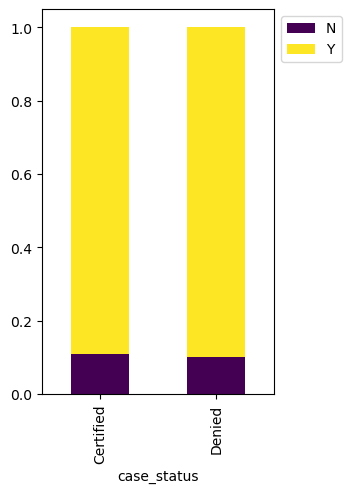

case_status  Certified  Denied    All
case_status                          
Denied               0    8446   8446
All              17001    8446  25447
Certified        17001       0  17001
------------------------------------------------------------------------------------------------------------------------


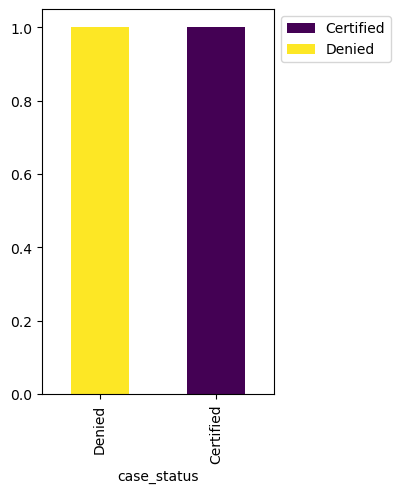

employee_size  0-1000  1000-2000  2000-3000  3000-4000  4000+    All
case_status                                                         
All              6208       5915       4978       3548   4798  25447
Certified        4091       3878       3330       2341   3361  17001
Denied           2117       2037       1648       1207   1437   8446
------------------------------------------------------------------------------------------------------------------------


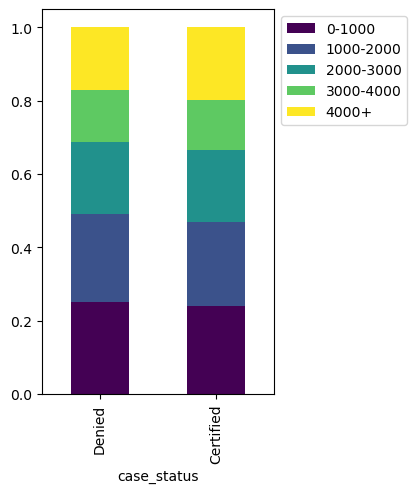

In [46]:
#create a table and stacked barplot for each variable with a data type of category by case_status
cols_cat = data.select_dtypes(['category'])
for i in cols_cat.columns:
    stacked_barplot(data, "case_status", i)

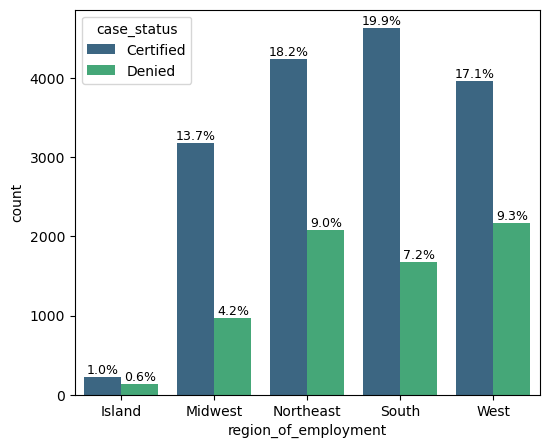

In [47]:
#create a barplot of region of employment for an applicant's job with the corresponding percent of approved and denied cases for each
labeled_barplot(data_annual,'region_of_employment','case_status',perc=True,order=None)

In [48]:
#create tables listing the mean wage for each unique value within each variable with a data type category
for col in data_annual.dtypes[data_annual.dtypes == 'category'].index:
    print(data_annual.groupby(col)['prevailing_wage'].mean())
    print(" ")

continent
Africa          82817.44
Asia            86237.72
Europe          62148.78
North America   80015.78
Oceania         83806.39
South America   73641.62
Name: prevailing_wage, dtype: float64
 
education_of_employee
Bachelor's    81153.74
Doctorate     67498.27
High School   80905.55
Master's      84849.96
Name: prevailing_wage, dtype: float64
 
has_job_experience
N   86478.62
Y   77881.05
Name: prevailing_wage, dtype: float64
 
requires_job_training
N   80867.28
Y   84473.58
Name: prevailing_wage, dtype: float64
 
region_of_employment
Island      96323.02
Midwest     94900.09
Northeast   77091.74
South       82174.41
West        74720.82
Name: prevailing_wage, dtype: float64
 
unit_of_wage
Hour         NaN
Month   87592.86
Week    85606.82
Year    81237.54
Name: prevailing_wage, dtype: float64
 
full_time_position
N   105484.60
Y    78161.02
Name: prevailing_wage, dtype: float64
 
case_status
Certified   80816.02
Denied      82459.91
Name: prevailing_wage, dtype: float64
 
emplo

In [49]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,employee_size
0,Asia,High School,N,N,14513,2007,West,592.20,Hour,Y,Denied,4000+
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified,2000-3000
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied,4000+
3,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied,0-1000
4,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified,1000-2000


### Data Preprocessing

In [50]:
## label encoding case status where 1 = certified and 0 = Denied
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [51]:
#create a dataframe of the predictor feature columns
X = data.drop('case_status',axis=1)
#create a datafrane of the predicted class (1=True, 0=False)
Y = data['case_status']

#generate dummy variables for each categorical variable
X = pd.get_dummies(X, drop_first=True)

#split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [52]:
# printing the no. of rows in the train dataset
print("{0:0.2f}% data is in the training set".format((len(x_train)/len(data.index))*100))
# printing the no. of rows in the test dataset
print("{0:0.02f}% data is in the test set".format((len(x_test)/len(data.index))*100))

70.00% data is in the training set
30.00% data is in the test set


In [53]:
#confirm the shape of both data sets and the ratio of classes is the same across both train and test datasets
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print(' ')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print(' ')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17812, 25)
Shape of test set :  (7635, 25)
 
Percentage of classes in training set:
1   0.67
0   0.33
Name: case_status, dtype: float64
 
Percentage of classes in test set:
1   0.67
0   0.33
Name: case_status, dtype: float64


## Building bagging and boosting models

In [54]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    data_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return data_perf

In [55]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
#We start building our model with the decision tree classifier
dtree = DecisionTreeClassifier(criterion='gini', random_state=1, class_weight='balanced')

In [58]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

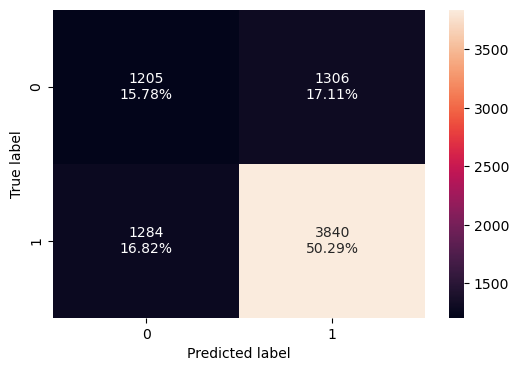

In [59]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(dtree, x_test, y_test)

In [60]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, x_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00


In [61]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, x_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0      0.66    0.75       0.75 0.75


### Bagging Classifier

In [62]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

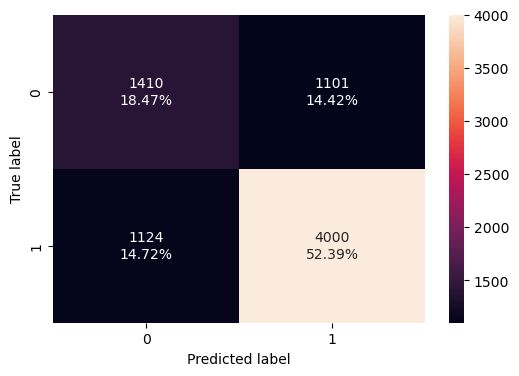

In [63]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(bagging, x_test, y_test)

In [64]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, x_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      0.99    0.99       0.99 0.99


In [65]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, x_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0      0.71    0.78       0.78 0.78


### Random Forest

In [66]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

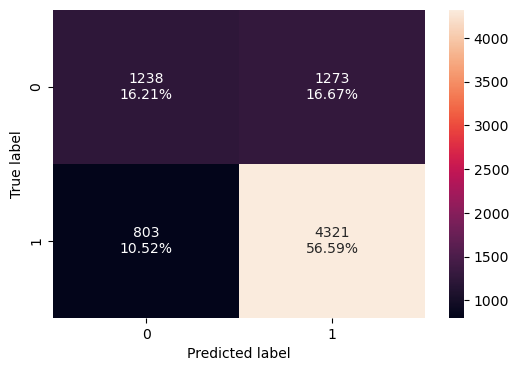

In [67]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(rf,x_test,y_test)

In [68]:
rf_model_train_perf=model_performance_classification_sklearn(rf,x_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00


In [69]:
rf_model_test_perf=model_performance_classification_sklearn(rf,x_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.84       0.77 0.81


### AdaBoost Classifier

In [70]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

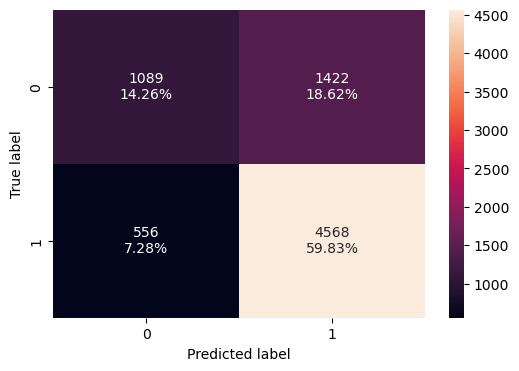

In [71]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(ab_classifier, x_test,y_test)

In [72]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,x_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      0.74    0.88       0.76 0.82


In [73]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,x_test,y_test)
print("Testing performance \n",ab_classifier_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0      0.74    0.89       0.76 0.82


This AdaBoost classifer performs equally well on the training and testing datasets, indicating that the model is not overfit.
Additionally, the model performs the best of any model yet (i.e., highest F1 score) on the testing data

### Gradient Boosting Classifier

In [74]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

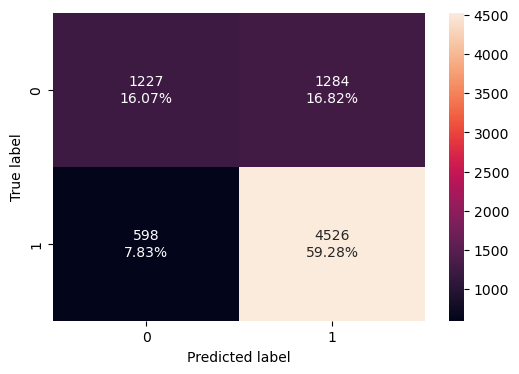

In [75]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(gbc, x_test,y_test)

In [76]:
gbc_classifier_model_train_perf = model_performance_classification_sklearn(gbc,x_train,y_train)
print("Training performance \n",gbc_classifier_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      0.76    0.88       0.78 0.83


In [77]:
gbc_classifier_model_test_perf = model_performance_classification_sklearn(gbc,x_test,y_test)
print("Training performance \n",gbc_classifier_model_test_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      0.75    0.88       0.78 0.83


This Gradient Boosting classifer performs equally well on the training and testing datasets, indicating that the model is not overfit.
Additionally, this model performs even better than the AdaBoost model above.

### XGBoost Classifier

In [78]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

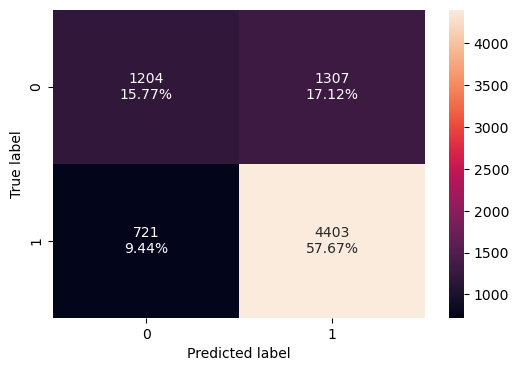

In [79]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(xgb, x_test,y_test)

In [80]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb,x_train,y_train)
print("Training performance \n",xgb_classifier_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      0.84    0.93       0.84 0.89


In [82]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb,x_test,y_test)
print("Training performance \n",xgb_classifier_model_test_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.86       0.77 0.81


This XGBoost classifer performs equally well on the training and testing datasets, indicating that the model is not overfit.
Additionally, this model performs as well as the AdaBoost model and slightly worse the Gradient Boost model on the test data.

### Base Models comparison

In [83]:
# create a dataframe comparing the performance of the base models on the training data

models_train_comp_data = pd.concat(
    [dtree_model_train_perf.T,
     bagging_model_train_perf.T,
     rf_model_train_perf.T,
     ab_classifier_model_train_perf.T, 
     gbc_classifier_model_train_perf.T, 
     xgb_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_data.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Training performance comparison of base models:")
models_train_comp_data

Training performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,1.00,0.99,1.00,0.74,0.76,0.84
Recall,1.00,0.99,1.00,0.88,0.88,0.93
Precision,1.00,0.99,1.00,0.76,0.78,0.84
F1,1.00,0.99,1.00,0.82,0.83,0.89


In [84]:
# create a dataframe comparing the performance of the base models on the testing data

models_test_comp_data = pd.concat(
    [dtree_model_test_perf.T,
     bagging_model_test_perf.T,
     rf_model_test_perf.T,
     ab_classifier_model_test_perf.T, 
     gbc_classifier_model_test_perf.T, 
     xgb_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_data.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Testing performance comparison of base models:")
models_test_comp_data

Testing performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.66,0.71,0.73,0.74,0.75,0.73
Recall,0.75,0.78,0.84,0.89,0.88,0.86
Precision,0.75,0.78,0.77,0.76,0.78,0.77
F1,0.75,0.78,0.81,0.82,0.83,0.81


the bagging models perform best on the training data, due to all three of the models overfitting this data set.However all three of the boosting models do not overfit the data and achieve higher F1 scores on the training data set, with the Gradient Boosting classifier performing the best.

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

##  Will tuning the hyperparameters improve the model performance?

In [86]:
#Tuning a decision tree
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(5,30,5),
              'min_samples_leaf': [3, 5, 7],
              'max_leaf_nodes' : [2, 4, 6],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

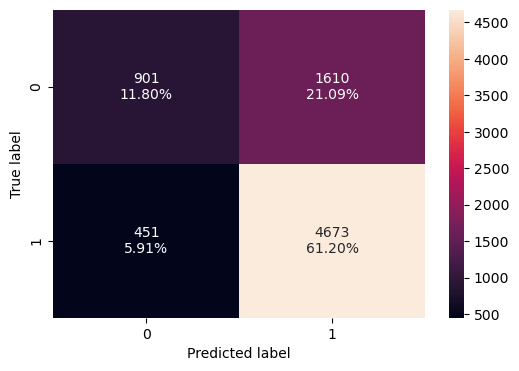

In [87]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(dtree_estimator, x_test,y_test)

In [88]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, x_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.91       0.74 0.82


In [89]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, x_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.91       0.74 0.82


The Decision Tree model after tuning performs equally well on the training and testing datasets, indicating that the model is not overfit.
Additionally, this model performs as well as two out of the three boosting models above on the test data.
Both of these indicate this tuned model is a significant improvements over the base model.

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
## Tuning Bagging classifier
# random search for bagging classifier
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : np.arange(50, 100, 10)
             }

#run the randomized search
rand_bag = RandomizedSearchCV(BaggingClassifier(random_state=1,bootstrap=True), 
                              parameters, scoring = 'f1', cv = 5, random_state=1)
rand_bag = rand_bag.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bag_tuned = rand_bag.best_estimator_

# Fit the best algorithm to the data
bag_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.8, n_estimators=70,
                  random_state=1)

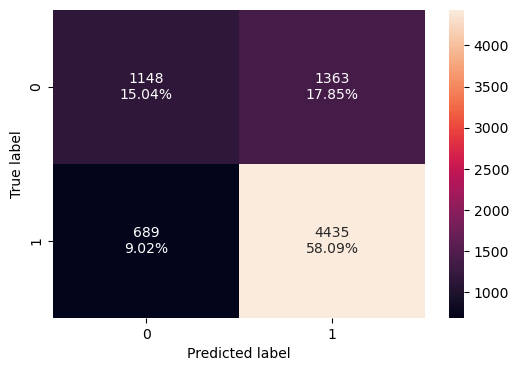

In [96]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(bag_tuned, x_test,y_test)

In [97]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bag_tuned, x_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00


In [98]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bag_tuned, x_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.87       0.76 0.81


The Bagging Classifier after tuning performs far less well on the test data than on the training data, indicating that the model is still overfit.
However, this model does perform better than the base model.

In [94]:
## Tuning Random FOrest
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10, 40, 10),
              "min_samples_leaf": np.arange(5, 10),
              "min_samples_split": [3, 5, 7],
              "max_features": ["sqrt", "log2"],
              "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Run the randomized search
rand_rf = RandomizedSearchCV(rf_estimator, parameters, scoring='f1', cv=5, n_jobs=-1, random_state=1)
rand_rf = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = rand_rf.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

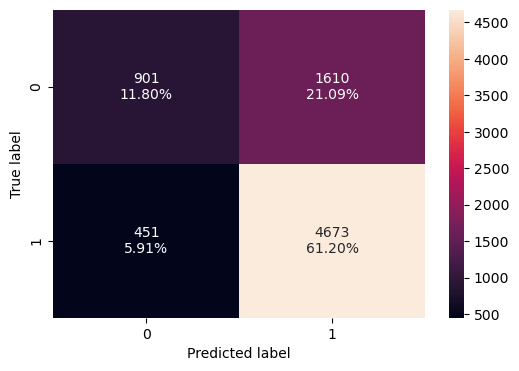

In [99]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(rf_estimator, x_test,y_test)

In [100]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.91       0.74 0.82


In [101]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, x_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.91       0.74 0.82


The Random Forest after tuning performs equally well on the training and testing datasets, indicating that the model is not overfit.
Additionally, this model performs as well as two out of the three boosting models and the tuned Decision Tree on the test data.
Both of these indicate this tuned model is a significant improvements over the base model.

In [95]:
## Tuning Ada Boost classifier
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=2, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=3, random_state=1, class_weight='balanced')],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_abc = RandomizedSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1, random_state=1)
rand_abc = rand_abc.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = rand_abc.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.5, n_estimators=20, random_state=1)

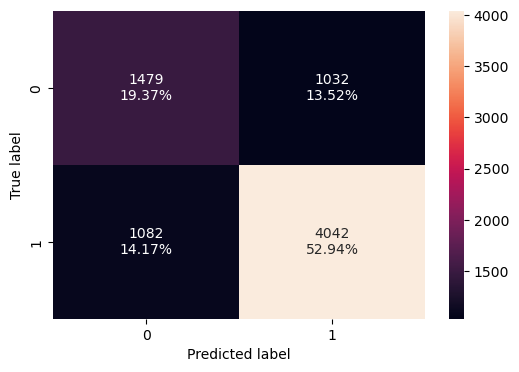

In [102]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(abc_tuned, x_test,y_test)

In [103]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, x_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      0.72    0.78       0.79 0.79


In [104]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, x_test, y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0      0.72    0.79       0.80 0.79


In [105]:
## Tuning GradientBoost Classifier
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250,300],
              "subsample":[0.8,0.9,1],
              "max_features":[0.7,0.8,0.9,1],
              "learning_rate": np.arange(0.1, 0.4, 0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_gb = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_gb = rand_gb.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = rand_gb.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_features=0.7, n_estimators=300, random_state=1,
                           subsample=1)

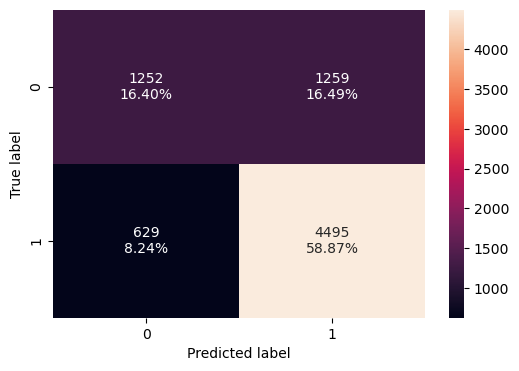

In [106]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(gb_tuned, x_test,y_test)

In [107]:
gb_tuned_model_train_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.91       0.74 0.82


In [108]:
gb_tuned_model_test_perf=model_performance_classification_sklearn(rf_estimator, x_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.91       0.74 0.82


In [109]:
## Tuning XGB Classifier
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10,100,20),
              "scale_pos_weight":[0,1,2,5],
              "subsample":[0.5,0.7,0.9,1],
              "learning_rate":[0.01,0.1,0.2,0.05],
              "gamma":[0,1,3],
              "colsample_bytree":[0.5,0.7,0.9,1],
              "colsample_bylevel":[0.5,0.7,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_xgb = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_xgb = rand_xgb.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = rand_xgb.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=70,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

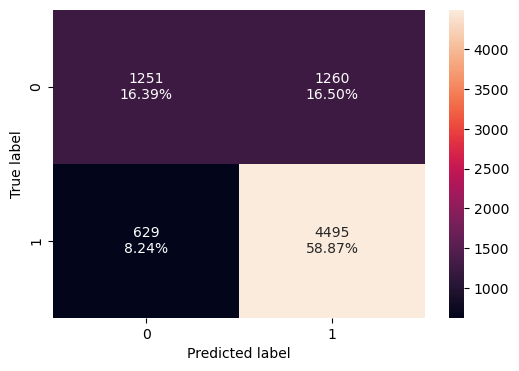

In [110]:
confusion_matrix_sklearn(xgb_tuned, x_test,y_test)

In [111]:
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned, x_train,y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0      0.77    0.89       0.79 0.84


In [112]:
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned, x_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0      0.75    0.88       0.78 0.83


The XGBoost classifier after tuning is less overfit than the base model, but performs equally well on the test data.
This indicates a minor improvement over the base model.

## Model Performance Comparison and Conclusions

In [114]:
# create a dataframe comparing the performance of the tuned models on the training data

tuned_models_train_comp_data = pd.concat(
    [dtree_estimator_model_train_perf.T,
     bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T,
     abc_tuned_model_train_perf.T, 
     gb_tuned_model_train_perf.T, 
     xgb_tuned_model_train_perf.T],
    axis=1,
)
tuned_models_train_comp_data.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Training performance comparison of tuned models:")
tuned_models_train_comp_data

Training performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.73,1.00,0.73,0.72,0.73,0.77
Recall,0.91,1.00,0.91,0.78,0.91,0.89
Precision,0.74,1.00,0.74,0.79,0.74,0.79
F1,0.82,1.00,0.82,0.79,0.82,0.84


In [115]:
# create a dataframe comparing the performance of the tuned models on the testing data

tuned_models_test_comp_data = pd.concat(
    [dtree_estimator_model_test_perf.T,
     bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T,
     abc_tuned_model_test_perf.T, 
     gb_tuned_model_test_perf.T, 
     xgb_tuned_model_test_perf.T],
    axis=1,
)
tuned_models_test_comp_data.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Testing performance comparison of tuned models:")
tuned_models_test_comp_data

Testing performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.73,0.73,0.73,0.72,0.73,0.75
Recall,0.91,0.87,0.91,0.79,0.91,0.88
Precision,0.74,0.76,0.74,0.80,0.74,0.78
F1,0.82,0.81,0.82,0.79,0.82,0.83


In [116]:
# create a dataframe comparing the performance all models on the training data
all_models_train_comp = pd.concat([models_train_comp_data,tuned_models_train_comp_data],axis=1)
all_models_train_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Decision Tree,1.00,1.00,1.00,1.00
Random Forest,1.00,1.00,1.00,1.00
Tuned Bagging Classifier,1.00,1.00,1.00,1.00
Bagging Classifier,0.99,0.99,0.99,0.99
XGBoost Classifier,0.84,0.93,0.84,0.89
Tuned XGBoost Classifier,0.77,0.89,0.79,0.84
Gradient Boosting Classifier,0.76,0.88,0.78,0.83
AdaBoost Classifier,0.74,0.88,0.76,0.82
Tuned Decision Tree,0.73,0.91,0.74,0.82
Tuned Random Forest,0.73,0.91,0.74,0.82


In [117]:
# create a dataframe comparing the performance of all models on the testing data
all_models_test_comp = pd.concat([models_test_comp_data,tuned_models_test_comp_data],axis=1)
all_models_test_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Gradient Boosting Classifier,0.75,0.88,0.78,0.83
Tuned XGBoost Classifier,0.75,0.88,0.78,0.83
AdaBoost Classifier,0.74,0.89,0.76,0.82
Tuned Decision Tree,0.73,0.91,0.74,0.82
Tuned Random Forest,0.73,0.91,0.74,0.82
Tuned Gradient Boosting Classifier,0.73,0.91,0.74,0.82
XGBoost Classifier,0.73,0.86,0.77,0.81
Tuned Bagging Classifier,0.73,0.87,0.76,0.81
Random Forest,0.73,0.84,0.77,0.81
Tuned AdaBoost Classifier,0.72,0.79,0.80,0.79


As expected the Decision Tree model performs the best on the training dataset, since the model will significantly overfit this data unless pruned otherwise.
The base Gradient Boosting classifier performs the best on the testing dataset, with an 0.83 F1 score.
Four other models tied for the second-best performance, with an F1 score of 0.82.

## Actionable Insights and Recommendations

### Insights
##### The three most important components for pre-screening an applicant are
##### 1. Education level - An applicant with a master's degree or doctorate is more sought after for the visa approval compared to a high school diploma
##### 2. Prior Job approval - An applicant with prior job experience is likely to be approved compared to an applicant without any job experience
##### 3. Prevailing wage - The higher the prevailing wage of the job an applicant is applying for, the more likely the application will be approved. This is especially true for applications for jobs with an hourly unit of wage.


#### Recommendations 
the OFLC can focus its resources towards screening a batch of applications for those most likely to be approved by doing :
Sorting applications by level of education and review the higher levels of education first.
Sorting applications by previous job experience and review those with experience first.
Dividing applications for jobs into those with an hourly wage and those with an annual wage, sort each group by the prevailing wage, then review applications for salaried jobs first from highest to lowest wage.
As stated previously, the Gradient Boosting classifier performs the best of all the models created. However, as shown above, the tuned Decision-Tree model performs barely worse by F1 score and is a far simpler model. This model may be preferable if post-hoc explanations of OFLC decision-making is expected to be required.
Furthermore, OFLC should examine more thoroughly why whether an application will be certified or denied can be very well predicted through just three nodes as shown above.
For those in less skilled, entry-level, and/or hourly jobs, the system would appear to be biased against these applications being certified.